# Import all the required libraries

---



In [54]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [55]:
START = "2010-01-01"
# # TODAY = date.today().strftime("%Y-%m-%d")
TODAY = "2023-10-20"

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [56]:
ticker_label = 'TATAMOTORS.NS'
#Change ticker label to 'RELIANCE.NS' for RELIANCE stock
data = load_data(ticker_label)
df=data
df

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,2010-01-04 00:00:00+00:00,152.195343,163.535919,164.040497,156.184769,156.303482,27906448
1,2010-01-05 00:00:00+00:00,149.543488,160.686478,167.147186,153.246277,162.259598,23669317
2,2010-01-06 00:00:00+00:00,149.773666,160.933823,162.932388,159.311234,162.200241,14990820
3,2010-01-07 00:00:00+00:00,144.654144,155.432831,161.923218,154.344498,161.171280,22722030
4,2010-01-08 00:00:00+00:00,145.445999,156.283707,159.251862,155.343781,156.323273,16495776
...,...,...,...,...,...,...,...
3402,2023-10-13 00:00:00+00:00,665.047668,667.099976,669.000000,633.000000,633.950012,28011678
3403,2023-10-16 00:00:00+00:00,664.150513,666.200012,677.799988,661.250000,668.549988,20005816
3404,2023-10-17 00:00:00+00:00,653.682800,655.700012,670.900024,654.650024,670.000000,10263992


In [57]:
print(df.columns)
# df = df.drop(['Date', 'Dividends', 'Stock Splits'], axis = 1)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

MultiIndex([(     'Date',              ''),
            ('Adj Close', 'TATAMOTORS.NS'),
            (    'Close', 'TATAMOTORS.NS'),
            (     'High', 'TATAMOTORS.NS'),
            (      'Low', 'TATAMOTORS.NS'),
            (     'Open', 'TATAMOTORS.NS'),
            (   'Volume', 'TATAMOTORS.NS')],
           names=['Price', 'Ticker'])


<ipython-input-57-069333f050b2>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,163.535919,164.040497,156.184769,156.303482,27906448
1,160.686478,167.147186,153.246277,162.259598,23669317
2,160.933823,162.932388,159.311234,162.200241,14990820
3,155.432831,161.923218,154.344498,161.171280,22722030
4,156.283707,159.251862,155.343781,156.323273,16495776


Visualizing Closing Price

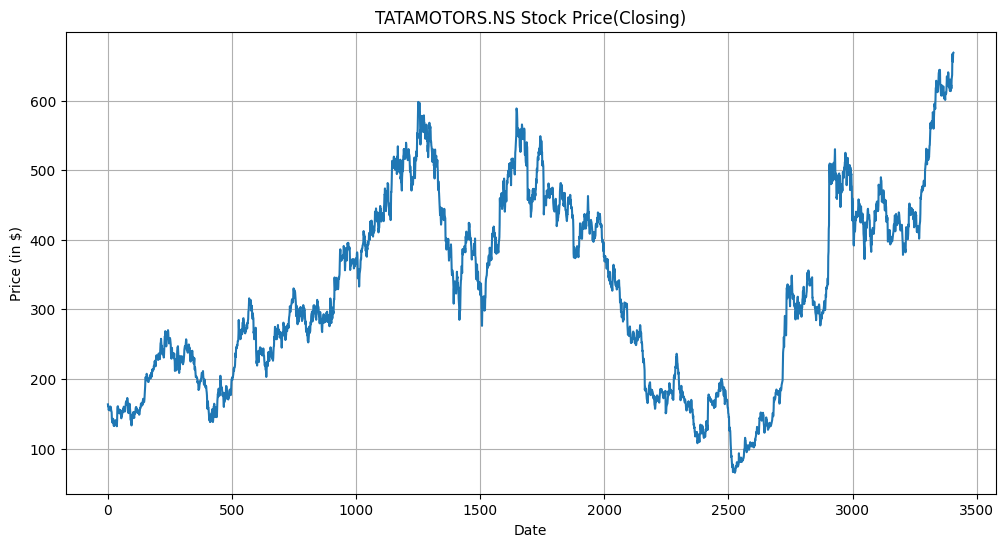

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("{} Stock Price(Closing)".format(ticker_label))
plt.xlabel("Date")
plt.ylabel("Price (in $)")
plt.grid(True)
plt.show()

In [59]:
df

Price,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,163.535919,164.040497,156.184769,156.303482,27906448
1,160.686478,167.147186,153.246277,162.259598,23669317
2,160.933823,162.932388,159.311234,162.200241,14990820
3,155.432831,161.923218,154.344498,161.171280,22722030
4,156.283707,159.251862,155.343781,156.323273,16495776
...,...,...,...,...,...
3402,667.099976,669.000000,633.000000,633.950012,28011678
3403,666.200012,677.799988,661.250000,668.549988,20005816
3404,655.700012,670.900024,654.650024,670.000000,10263992


## Spliting the dataset into training (70%) and testing (30%) set

In [60]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2384, 7)
(1023, 7)


# Using MinMax scaler for normalization of the dataset

---



In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [62]:
# Taking the 'close' price values
train_close = train['Close'].values.reshape(-1, 1)
test_close = test['Close'].values.reshape(-1, 1)
test_dates = test['Date'].values.reshape(-1, 1)

data_training_array = scaler.fit_transform(train_close)
print(data_training_array.shape)

(2384, 1)


In [63]:
x_train = []
y_train = []
lookback_window_length = 20

for i in range(lookback_window_length, data_training_array.shape[0]):
    x_train.append(data_training_array[i-lookback_window_length: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [64]:
print(x_train.shape)
print(y_train.shape)
print(test_close.shape)

past_lookback_days = pd.DataFrame(train_close[-lookback_window_length:])

(2364, 20, 1)
(2364,)
(1023, 1)


In [65]:
test_df = pd.DataFrame(test_close)
print(test_df.shape)

(1023, 1)


**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [66]:
final_df = pd.concat([past_lookback_days, test_df], axis=0, ignore_index = True)
print(final_df.shape)

(1043, 1)


In [67]:
input_data = scaler.fit_transform(final_df)
print(input_data.shape)
print(input_data)

(1043, 1)
[[0.0968517 ]
 [0.09478044]
 [0.08632974]
 ...
 [0.97829333]
 [0.99950292]
 [1.        ]]


In [68]:
x_test = []
y_test = []
for i in range(lookback_window_length, input_data.shape[0]):
   x_test.append(input_data[i-lookback_window_length: i])
   y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)
print(y_test)

(1023, 20, 1)
(1023,)
[0.0874068  0.09270919 0.09378625 ... 0.97829333 0.99950292 1.        ]


# ML Model (LSTM GRU Hybrid)

---



In [69]:
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input
from tensorflow.keras.models import Sequential

In [70]:
model = Sequential()

model.add(Input(shape=(x_train.shape[1], 1)))

model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, activation = 'tanh', return_sequences=True))
model.add(Dropout(0.3))

model.add(tf.keras.layers.GRU(60,return_sequences=False))
model.add(tf.keras.layers.Dropout(.2,))

model.add(Dense(units = 1))

In [71]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 20, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 20, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 20, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 20, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 60)                  │          20,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,821 (198.52 KB)

 Trainable params: 50,821 (198.52 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [72]:
# Train the model with validation data
model.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0752 - val_loss: 0.0010
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0047 - val_loss: 0.0010
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0053 - val_loss: 0.0012
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0046 - val_loss: 0.0011
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0041 - val_loss: 0.0010
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0032 - val_loss: 8.6332e-04
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0030 - val_loss: 0.0010
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0031 - val_loss: 8.4691e-04
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0028 - val_loss: 9.0301e-04
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/ste

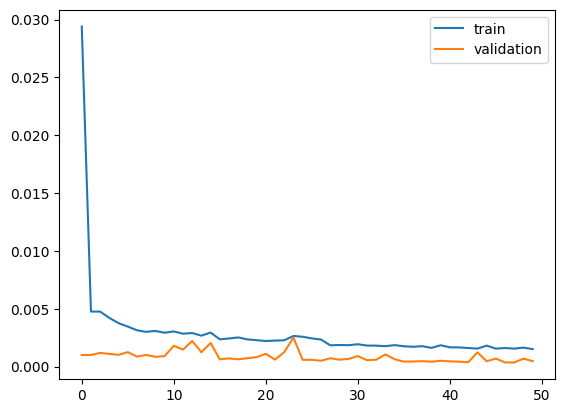

In [73]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

# Making prediction and plotting the graph of predicted vs actual values

---



In [74]:
# Making predictions
y_pred = model.predict(x_test)
print(y_pred.shape)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
(1023, 1)


In [75]:
scale_factor = 1/scaler.scale_[0]
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

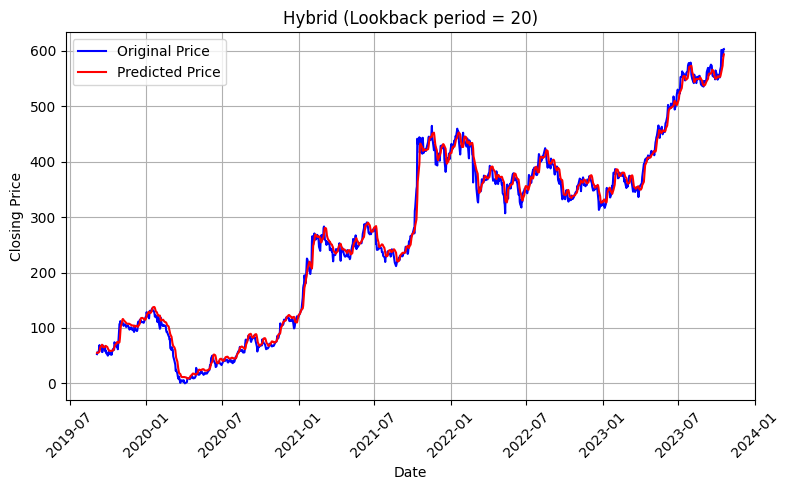

In [76]:
plt.figure(figsize = (8, 5))
plt.plot(test_dates, y_test, 'b', label = "Original Price")
plt.plot(test_dates, y_pred, 'r', label = "Predicted Price")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.title("Hybrid (Lookback period = {})".format(lookback_window_length))
plt.tight_layout()
plt.savefig('plot.png', bbox_inches='tight', dpi=1200)
plt.show()


# Model evaluation

Calculation of mean absolute error

In [77]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean absolute error on test set: {mae}")

Mean absolute error on test set: 8.97948292296886


Calculation of R2 score

In [78]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9939523988252218
